### INTERCOMPARISON DATA

In [1]:
f_meisei  = '/scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc'
f_vaisala = '/scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_vaisala_ascents.csv.nc'



In [2]:
import h5py as h5
import pandas as pd
import numpy as np
from tqdm import tqdm
import os,sys
    
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
def read(file):
    h = h5.File(file, 'r')
    ot = h['observations_table']
    ht = h['header_table']
    d = {}
    var = ['date_time','z_coordinate', 'z_coordinate_type', 'observed_variable', 'observation_value'   ]
    for v in var:
        if v =='date_time':
            vv = pd.to_datetime( ot[v][:], unit='s',  origin=pd.Timestamp('1900-01-01') )
            
            # apparently there is a 4 hour offset between MEISEI and VAISALA
            # we consider the VAISALA as the correct one
            # we adjust the MEISEI by subracting 4 hours
            
            if 'meisei' in file:  # apparently there is a 4 hour offset between MEISEI and VAISALA
                delta = pd.Timedelta(hours=4)
                vv = vv - delta
                
        else:
            vv = ot[v][:]
        d[v] = vv
    print("Creating the dataframe ::: ") 
    df = pd.DataFrame.from_dict( d )
    df['z_coordinate'] = df['z_coordinate'].astype(float)
    print("Created the dataframe ::: ") 
    
    ts = ht['report_timestamp'][:]
    
    tss = np.unique(pd.to_datetime(ts, unit='s',  origin=pd.Timestamp('1900-01-01') ) )
    
    if 'meisei' in file:
        df['source_id'] = 'MEISEI'
    elif 'vaisala' in file:
        df['source_id'] = 'VAISALA'
    df = df.sort_values(by=['date_time', 'z_coordinate'], ascending=False)
    return df, tss 


/tmp/ipykernel_3923544/4287206905.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Reading the harvested netCDF files for MEISEL and VAISALA

In [3]:
print("*** Reading MEISEI")
df_meisei, ts_meisei = read(f_meisei)
print('Adding hour, date' )
df_meisei['hour']= df_meisei.date_time.dt.hour.astype(int)
df_meisei['date']= df_meisei.date_time.dt.date.astype(str)
print('Sorting' )
df_meisei = df_meisei.sort_values(by=["date_time", "z_coordinate"], ascending=True)

*** Reading MEISEI
Creating the dataframe ::: 
Created the dataframe ::: 
Adding hour, date
Sorting


In [4]:
print("*** Reading VAISALA")
df_vaisala, ts_vaisala = read(f_vaisala) 
print('Adding hour, date' )
df_vaisala['hour']= df_vaisala.date_time.dt.hour.astype(int)
df_vaisala['date']= df_vaisala.date_time.dt.date.astype(str)
print('Sorting' )
df_vaisala = df_vaisala.sort_values(by=["date_time", "z_coordinate"], ascending=True)

*** Reading VAISALA
Creating the dataframe ::: 
Created the dataframe ::: 
Adding hour, date
Sorting


In [5]:
print("VAISALA TIME STAMPS ", len(np.unique(df_vaisala.date_time)) )

VAISALA TIME STAMPS  56


In [6]:
print("MEISEI TIME STAMPS", len(np.unique(df_meisei.date_time)) ) 

MEISEI TIME STAMPS 250268


In [7]:
### CONSTRUCT AND SAVE DATAFRAMES OF SIMILAR TIMESTAMPS
out_dir = 'MAURITIUS_2005_ANALYSIS'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
    
for dt in tqdm(np.unique(df_vaisala.date_time)):
    df_vaisala_red = df_vaisala.loc[df_vaisala.date_time == dt ]
     # find closest meisei data
    df_meisei_red = df_meisei.loc[ abs(df_meisei.date_time -dt ) < pd.Timedelta(minutes=90)  ]
    dt_s = str(dt)
    df_meisei_red.to_csv(out_dir + '/' + dt_s + '_MEISEI.csv' , sep = '\t')
    df_vaisala_red.to_csv(out_dir + '/' + dt_s + '_VAISALA.csv' , sep = '\t')


100%|██████████| 56/56 [00:10<00:00,  5.50it/s]


In [8]:
df_vaisala_red[:10]

date_time  z_coordinate  z_coordinate_type  \
1275708 2005-02-25 10:17:06  590.0         1                   
1275709 2005-02-25 10:17:06  590.0         1                   
1275710 2005-02-25 10:17:06  590.0         1                   
1275711 2005-02-25 10:17:06  590.0         1                   
1275712 2005-02-25 10:17:06  590.0         1                   
1275713 2005-02-25 10:17:06  590.0         1                   
1275714 2005-02-25 10:17:06  590.0         1                   
1275715 2005-02-25 10:17:06  590.0         1                   
1275716 2005-02-25 10:17:06  590.0         1                   
1275717 2005-02-25 10:17:06  590.0         1                   

         observed_variable  observation_value source_id  hour        date  
1275708  126                239.250000         VAISALA   10    2005-02-25  
1275709  138                0.010000           VAISALA   10    2005-02-25  
1275710  107                38.400002          VAISALA   10    2005-02-25  
1275711  106                92.000000          VAISALA   10    2005-02-25  
1275712  126                239.250000         VAISALA   10    2005-02-25  
1275713  138                0.010000           VAISALA   10    2005-02-25  
1275714  107                38.400002          VAISALA   10    2005-02-25  
1275715  106                92.000000          VAISALA   10    2005-02-25  
1275716  126                239.250000         VAISALA   10    2005-02-25  
1275717  138                0.010000           VAISALA   10    2005-02-25

In [9]:
df_meisei_red[:10]

date_time  z_coordinate  z_coordinate_type  \
942268 2005-02-25 09:51:01  100890.0      1                   
942269 2005-02-25 09:51:01  100890.0      1                   
942270 2005-02-25 09:51:01  100890.0      1                   
942271 2005-02-25 09:51:01  100890.0      1                   
942272 2005-02-25 09:52:12  100890.0      1                   
942273 2005-02-25 09:52:12  100890.0      1                   
942274 2005-02-25 09:52:12  100890.0      1                   
942275 2005-02-25 09:52:12  100890.0      1                   
942276 2005-02-25 09:52:13  100890.0      1                   
942277 2005-02-25 09:52:13  100890.0      1                   

        observed_variable  observation_value source_id  hour        date  
942268  126                306.549988         MEISEI    9     2005-02-25  
942269  138                0.297000           MEISEI    9     2005-02-25  
942270  107                0.000000           MEISEI    9     2005-02-25  
942271  106                180.000000         MEISEI    9     2005-02-25  
942272  126                306.549988         MEISEI    9     2005-02-25  
942273  138                0.297000           MEISEI    9     2005-02-25  
942274  107                0.000000           MEISEI    9     2005-02-25  
942275  106                180.000000         MEISEI    9     2005-02-25  
942276  126                306.549988         MEISEI    9     2005-02-25  
942277  138                0.297000           MEISEI    9     2005-02-25

In [10]:
df = df_meisei.drop_duplicates(subset= ['date', 'hour'])
ts_meisei = np.unique( df.date_time )
ts_meisei

array(['2005-02-06T20:00:00.000000000', '2005-02-07T00:00:09.000000000',
       '2005-02-07T09:36:55.000000000', '2005-02-07T10:00:00.000000000',
       '2005-02-07T11:00:00.000000000', '2005-02-07T19:10:40.000000000',
       '2005-02-07T20:00:00.000000000', '2005-02-07T21:00:00.000000000',
       '2005-02-08T00:01:57.000000000', '2005-02-08T09:27:05.000000000',
       '2005-02-08T10:00:00.000000000', '2005-02-08T11:00:00.000000000',
       '2005-02-08T19:05:41.000000000', '2005-02-08T20:00:00.000000000',
       '2005-02-09T09:36:05.000000000', '2005-02-09T10:00:00.000000000',
       '2005-02-09T11:00:00.000000000', '2005-02-09T19:05:36.000000000',
       '2005-02-09T20:00:00.000000000', '2005-02-09T21:00:00.000000000',
       '2005-02-10T09:36:52.000000000', '2005-02-10T10:00:00.000000000',
       '2005-02-10T11:00:00.000000000', '2005-02-10T18:38:37.000000000',
       '2005-02-10T19:00:00.000000000', '2005-02-11T00:00:07.000000000',
       '2005-02-11T10:07:58.000000000', '2005-02-11

In [11]:
df = df_vaisala.drop_duplicates(subset= ['date', 'hour'])
ts_vaisala = np.unique( df.date_time )
ts_vaisala

array(['2005-02-07T10:01:53.000000000', '2005-02-07T14:57:50.000000000',
       '2005-02-07T19:31:41.000000000', '2005-02-08T05:13:16.000000000',
       '2005-02-08T10:00:56.000000000', '2005-02-08T15:03:03.000000000',
       '2005-02-08T19:33:03.000000000', '2005-02-09T05:12:00.000000000',
       '2005-02-09T10:05:05.000000000', '2005-02-09T14:59:48.000000000',
       '2005-02-09T19:17:51.000000000', '2005-02-10T05:02:13.000000000',
       '2005-02-10T09:58:41.000000000', '2005-02-10T14:57:54.000000000',
       '2005-02-10T19:00:19.000000000', '2005-02-11T05:02:45.000000000',
       '2005-02-11T15:05:21.000000000', '2005-02-11T18:31:58.000000000',
       '2005-02-12T15:00:05.000000000', '2005-02-12T18:36:55.000000000',
       '2005-02-14T05:06:57.000000000', '2005-02-14T10:08:04.000000000',
       '2005-02-14T15:00:54.000000000', '2005-02-14T18:00:36.000000000',
       '2005-02-15T05:16:46.000000000', '2005-02-15T10:03:06.000000000',
       '2005-02-15T15:01:34.000000000', '2005-02-15

In [12]:
df_vaisala.head(10)

date_time  z_coordinate  z_coordinate_type  observed_variable  \
0 2005-02-07 10:01:53  670.0         1                  126                 
1 2005-02-07 10:01:53  670.0         1                  138                 
2 2005-02-07 10:01:53  670.0         1                  107                 
3 2005-02-07 10:01:53  670.0         1                  106                 
4 2005-02-07 10:01:53  670.0         1                  126                 
5 2005-02-07 10:01:53  670.0         1                  138                 
6 2005-02-07 10:01:53  670.0         1                  107                 
7 2005-02-07 10:01:53  670.0         1                  106                 
8 2005-02-07 10:01:53  670.0         1                  126                 
9 2005-02-07 10:01:53  670.0         1                  138                 

   observation_value source_id  hour        date  
0  235.449997         VAISALA   10    2005-02-07  
1  0.010000           VAISALA   10    2005-02-07  
2  23.600000          VAISALA   10    2005-02-07  
3  64.000000          VAISALA   10    2005-02-07  
4  235.449997         VAISALA   10    2005-02-07  
5  0.010000           VAISALA   10    2005-02-07  
6  23.600000          VAISALA   10    2005-02-07  
7  65.000000          VAISALA   10    2005-02-07  
8  235.350006         VAISALA   10    2005-02-07  
9  0.010000           VAISALA   10    2005-02-07

In [13]:
import matplotlib.pyplot as plt

In [32]:
def make_profile(vaisala, meisei, ax, ind, var='' , date= '2005-02-14', hour=10):
    ax.plot(vaisala.observation_value, vaisala.z_coordinate , label = 'Vaisala', color = 'gold')
    ax.plot(meisei.observation_value, meisei.z_coordinate , label = 'Meisel', color = 'green')
    ax.set_yscale('log')
    ax.invert_yaxis()
    ax.set_title( str(date) + '-' + str(hour) , y = 1.02)
    if ind ==1:
        ax.legend()
    ax.grid(ls=':' , color = 'lightgray')
    #plt.show()
    #plt.close()
    #return fig

def extract_data_ts(file, var=126 ):
    df = pd.read_csv(file, sep = '\t')
    df_red = df.loc[ (df['observed_variable'] ==  var) ]
    
    if var == 126: # temp 
            df_red = df_red.loc[ (df_red['observation_value'] < 400) & (df_red['observation_value'] > 50) ]
            
    if var == 107: # temp 
            df_red = df_red.loc[ (df_red['observation_value'] < 150) & (df_red['observation_value'] > -150) ] 
    #if var == 106: # temp 
    #        df_red = df_red.loc[ (df_red['observation_value'] < 400) & (df_red['observation_value'] > 50) ]  
            
    return df_red
        

In [15]:
all_ts = [ f.split('_')[0] for f in os.listdir('MAURITIUS_2005_ANALYSIS') if 'MEISEI' in f ]

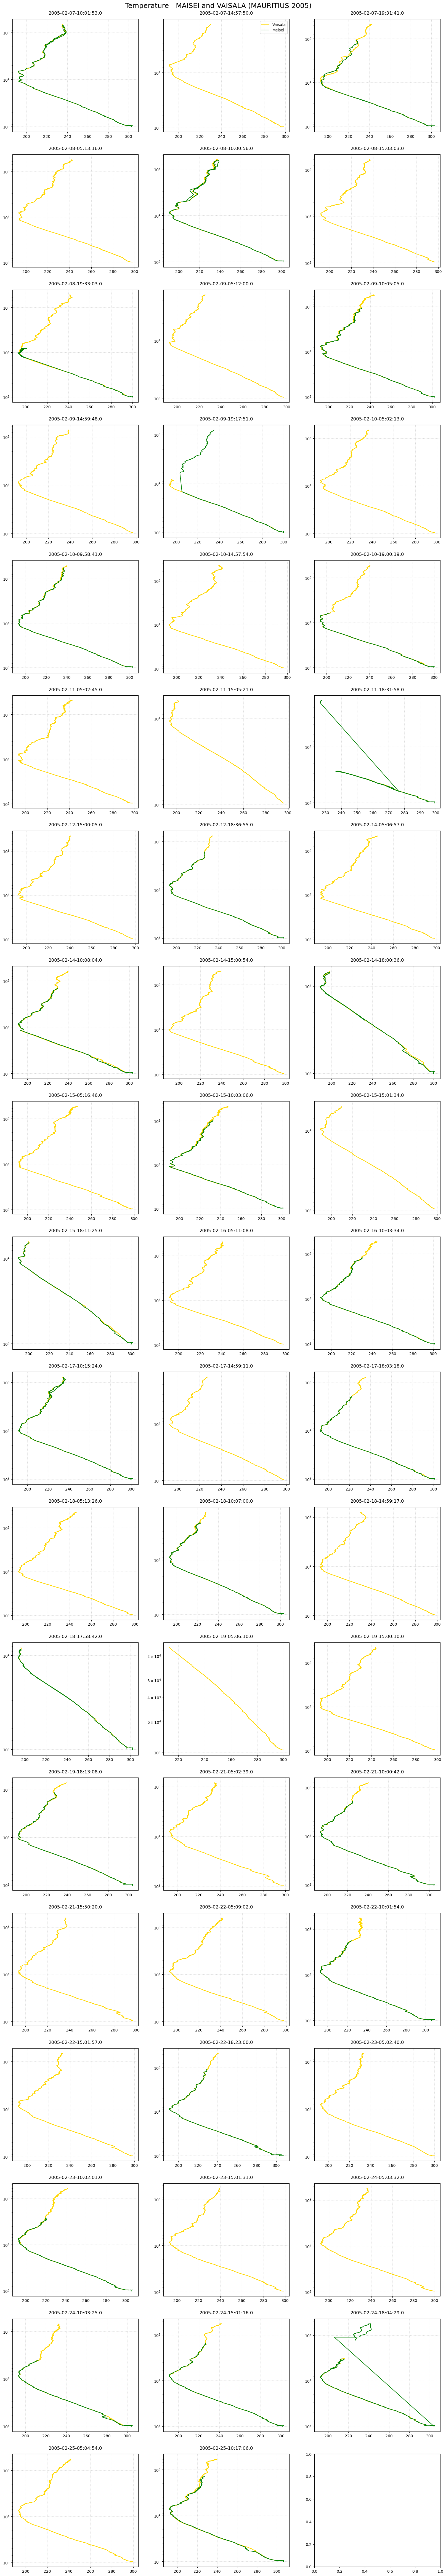

<Figure size 640x480 with 0 Axes>

In [33]:
fig, axes = plt.subplots(19, 3, figsize=(20, 120) )
# flattening axes 
axes= axes.flatten()

var = 126 
for ind,t in enumerate(all_ts):
    date = t[0:10]
    hour = t.split('T')[1][0:10]
    
    mei = 'MAURITIUS_2005_ANALYSIS/' + t + '_MEISEI.csv'
    vai = 'MAURITIUS_2005_ANALYSIS/' + t + '_VAISALA.csv'
    ax = axes[ind]
    df_mei = extract_data_ts(mei, var=var)
    df_vai = extract_data_ts(vai, var=var)
    
    f = make_profile(df_vai, df_mei, ax, ind, var=126 , date= date, hour=hour)
    
fig.suptitle("Temperature - MAISEI and VAISALA (MAURITIUS 2005) ", fontsize=18, y=0.885)
plt.show()
plt.savefig('MAURITIUS_2005_ANALYSIS/Temeprature_profiles', dpi=200)

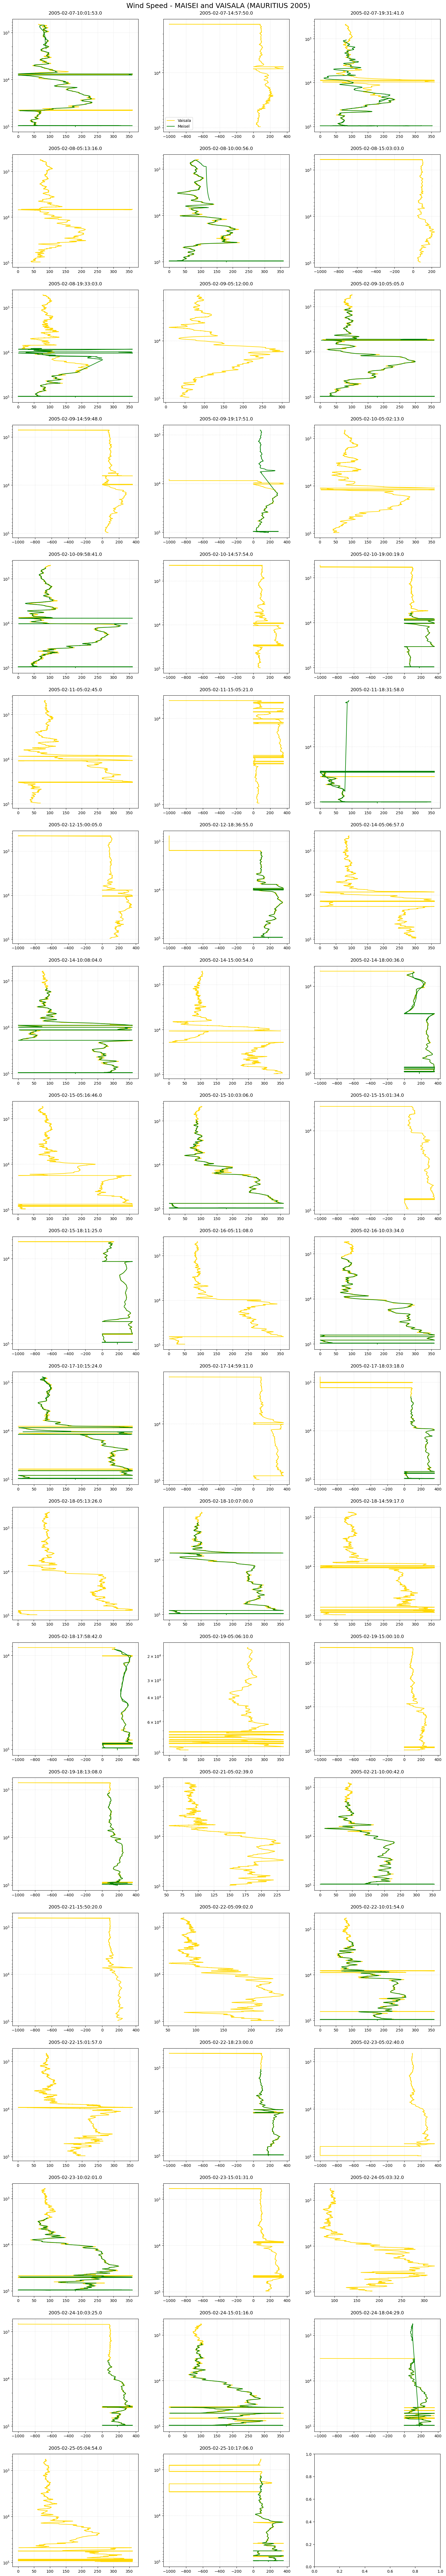

<Figure size 640x480 with 0 Axes>

In [34]:
fig, axes = plt.subplots(19, 3, figsize=(20, 120) )
# flattening axes 
axes= axes.flatten()

var = 106 
for ind,t in enumerate(all_ts):
    date = t[0:10]
    hour = t.split('T')[1][0:10]
    
    mei = 'MAURITIUS_2005_ANALYSIS/' + t + '_MEISEI.csv'
    vai = 'MAURITIUS_2005_ANALYSIS/' + t + '_VAISALA.csv'
    ax = axes[ind]
    df_mei = extract_data_ts(mei, var=var)
    df_vai = extract_data_ts(vai, var=var)
    
    f = make_profile(df_vai, df_mei, ax, ind, var=var , date= date, hour=hour)
    
fig.suptitle("Wind Speed - MAISEI and VAISALA (MAURITIUS 2005) ", fontsize=18, y=0.885)
plt.show()
plt.savefig('MAURITIUS_2005_ANALYSIS/WindDirection_profiles', dpi=200)



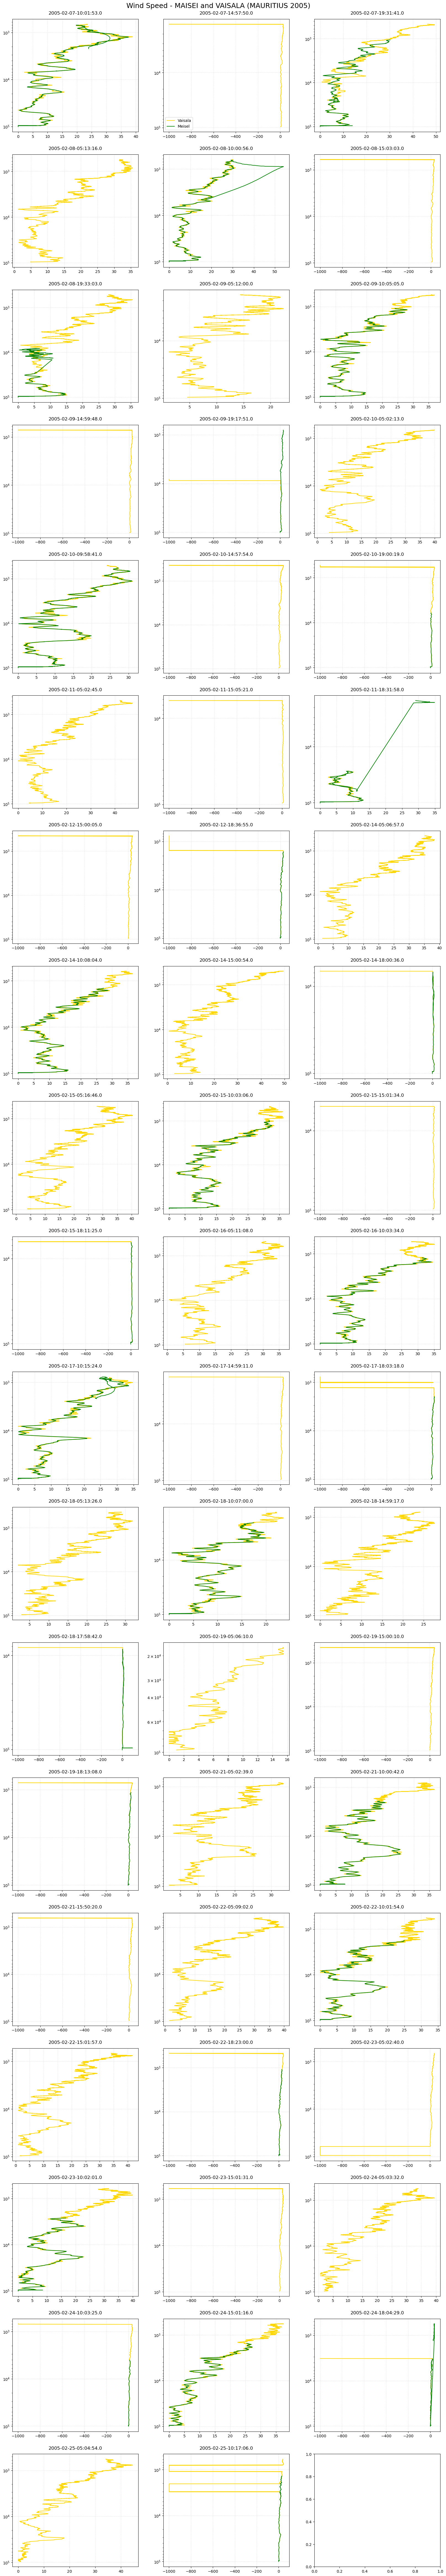

<Figure size 640x480 with 0 Axes>

In [31]:
fig, axes = plt.subplots(19, 3, figsize=(20, 120) )
# flattening axes 
axes= axes.flatten()

var = 107 
for ind,t in enumerate(all_ts):
    date = t[0:10]
    hour = t.split('T')[1][0:10]
    
    mei = 'MAURITIUS_2005_ANALYSIS/' + t + '_MEISEI.csv'
    vai = 'MAURITIUS_2005_ANALYSIS/' + t + '_VAISALA.csv'
    ax = axes[ind]
    df_mei = extract_data_ts(mei, var=var)
    df_vai = extract_data_ts(vai, var=var)
    
    f = make_profile(df_vai, df_mei, ax, ind, var=var , date= date, hour=hour)
    
fig.suptitle("Wind Speed - MAISEI and VAISALA (MAURITIUS 2005) ", fontsize=18, y=0.885)
plt.show()
plt.savefig('MAURITIUS_2005_ANALYSIS/WindSpeed_profiles', dpi=200)


In [19]:
#df_red = df_meisei.loc[ (df_meisei['date'] == pd.Timestamp('2005-02-07')) ] 
#df_red = df_meisei.loc[ (df_meisei['observed_variable'] == 126 ) ] 


In [20]:
#f, vai, mei =  make_profile(df_vaisala, df_meisei, var=126 , date= '2005-02-07', hour_m = 10 , hour_v = 14)

In [21]:
#f, vai, mei =  make_profile(df_vaisala, df_meisei, var=126 , date= '2005-02-07', hour_m = 11 , hour_v = 14)